# **Waze Project - Exploratory Data Analysis**


The Waze data analytics team is still in the early stages of their user churn project. To get clear insights, the user data must be inspected and prepared for the upcoming process of exploratory data analysis (EDA).

### Inspect and analyze data

**The purpose** of this project is to investigate and understand the data provided.
 
**The goal** is to use a dataframe contructed within Python, perform a cursory inspection of the provided dataset, and inform team members of your findings.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

In [3]:
df.to_csv('waze.csv')

In [4]:
### YOUR CODE HERE ###
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


- There is no missing data in the first 10 rows.
- According to df.info() output, there are different types of data in our dataset such as integer, float, and object. The dataset has 13 columns and 14999 rows. 
- Only column that has missing values is label. there are 700 missing values in label column.

In [6]:
# Isolate rows with null values
### YOUR CODE HERE ###
null_values = df[df['label'].isnull()]
# Display summary stats of rows with null values
### YOUR CODE HERE ###
null_values.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
# Isolate rows without null values
### YOUR CODE HERE ###
no_null_values = df[~df['label'].isnull()]
# Display summary stats of rows without null values
### YOUR CODE HERE ###
no_null_values.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


- There are no significant difference between the datasets other than count. Mean and std seems pretty consistent. 

In [8]:
# Get count of null values by device
### YOUR CODE HERE ###

null_values['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

- While 447 Iphone users had null values, the number of Android users who had null values is 253. 

In [9]:
# Calculate % of iPhone nulls and Android nulls
### YOUR CODE HERE ###
null_values['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [10]:
# Calculate % of iPhone users and Android users in full dataset
### YOUR CODE HERE ###
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

In [11]:
# Calculate counts of churned vs. retained
### YOUR CODE HERE ###
print(df['label'].value_counts())
df['label'].value_counts(normalize=True)


retained    11763
churned      2536
Name: label, dtype: int64


retained    0.822645
churned     0.177355
Name: label, dtype: float64

This dataset contains 82% retained users and 18% churned users.

In [12]:
# Calculate median values of all columns for churned and retained users
### YOUR CODE HERE ###
df.groupby('label').median()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. 

In [13]:
# Group data by `label` and calculate the medians
### YOUR CODE HERE ###
medians_by_label = df.groupby('label').median(numeric_only=True)
# Divide the median distance by median number of drives
### YOUR CODE HERE ###
medians_by_label['driven_km_drives']/medians_by_label['drives']

label
churned     73.053113
retained    73.716694
dtype: float64

The median user from both groups drove ~73 km/drive.

In [14]:
# Divide the median distance by median number of driving days
### YOUR CODE HERE ###
medians_by_label['driven_km_drives']/medians_by_label['driving_days']

label
churned     608.775944
retained    247.477472
dtype: float64

In [15]:
# Divide the median number of drives by median number of driving days
### YOUR CODE HERE ###
medians_by_label['drives']/medians_by_label['driving_days']

label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

In [16]:
# For each label, calculate the number of Android users and iPhone users
### YOUR CODE HERE ###
df.groupby(['label','device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [17]:
# For each label, calculate the percentage of Android users and iPhone users
### YOUR CODE HERE ###
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

1. The data contains missing values only in 'label' column. There are 700 values missing in that column. There was no pattern to the missing data.

2. The mean value gets affected by the outliers in the data. Median doesn't get affected by outliers therefore it can be a more accurate measure to estimate data.

3. In the analysis, it is observed that churned users has driven 608 km per day. It is a significantly higher value compared to retained users who has driven 245 km per day. Waze team should explore the reasons behind why churned users use the app or their specific needs and problems. 

4. The iPhone users is represented by % 65 of the data while Android users had % 35 approximately.

5. Churned users generally drove longer distances in fewer days.

1. All the columns except the 'ID' column are applicable to the problem since they represent user behavior.
2. We can eliminate the 'ID' column because we are not interested in a particular user.
3. We can use info() method to calculate the count of non-null values.
   - Request from data owners to fill the missing values
   - If the count of missing values is low and the missing values has low influence on the data, delete the rows with missing values
   - Create a NaN category
   - Fill missing values with median or average
4. Any data point that falls beyond 1.5 times the interquartile range is considered an outlier. We can use boxplot to visualize the outliers. To handle outliers:
   - Delete them
   - Reassign them
   - Leave them

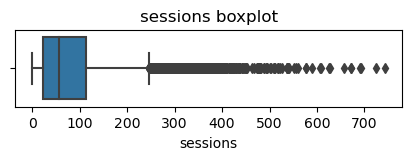

In [18]:
# sessions box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'])
plt.title('sessions boxplot')
plt.show()

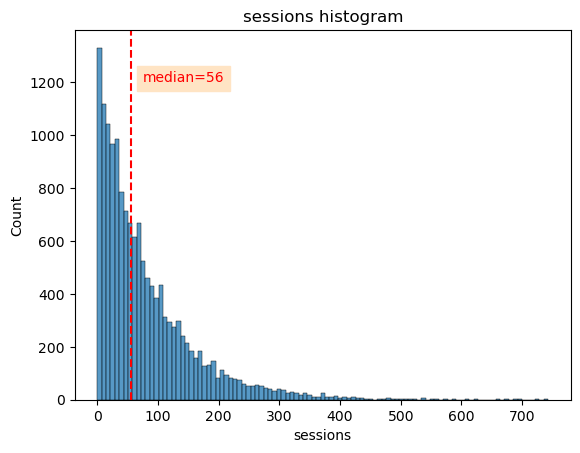

In [19]:
# Histogram
sns.histplot(x=df['sessions'])
plt.axvline(df['sessions'].median(), color='red', linestyle='--')
plt.text(75,1200,'median=56', color='red', backgroundcolor='bisque')
plt.title('sessions histogram')
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

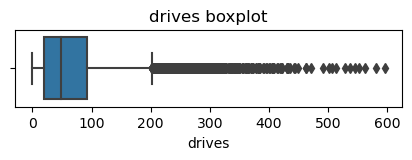

In [20]:
# drives box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'])
plt.title('drives boxplot')
plt.show()

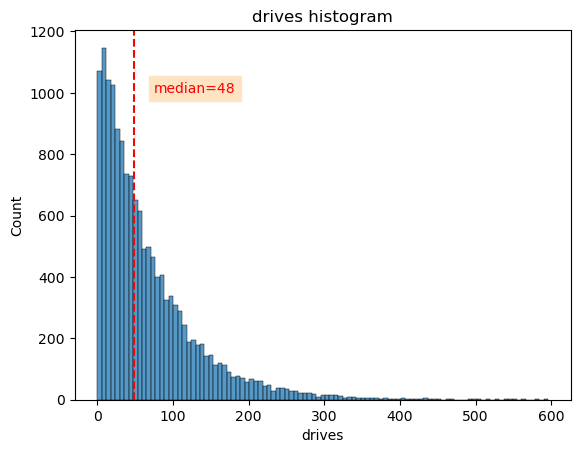

In [21]:
# drives histogram
sns.histplot(x=df['drives'])
plt.axvline(df['drives'].median(), color='red', linestyle='--')
plt.text(75,1000,'median=48',color='red', backgroundcolor='bisque')
plt.title('drives histogram')
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

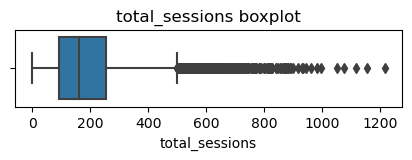

In [22]:
# total_sessions Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'])
plt.title('total_sessions boxplot')
plt.show()

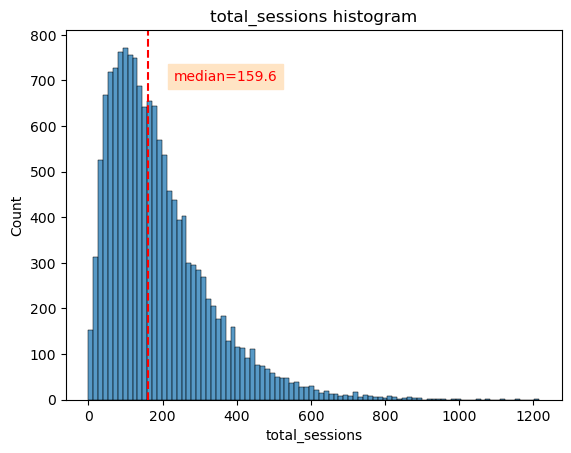

In [23]:
# total_sessions Histogram
sns.histplot(x=df['total_sessions'])
plt.axvline(df['total_sessions'].median(), color='red', linestyle='--')
plt.text(230,700,'median=159.6',color='red', backgroundcolor='bisque')
plt.title('total_sessions histogram')
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

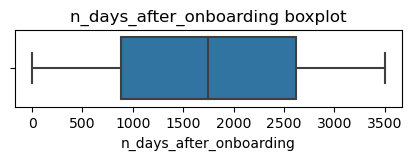

In [24]:
# n_days_after_onboarding Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'])
plt.title('n_days_after_onboarding boxplot')
plt.show()

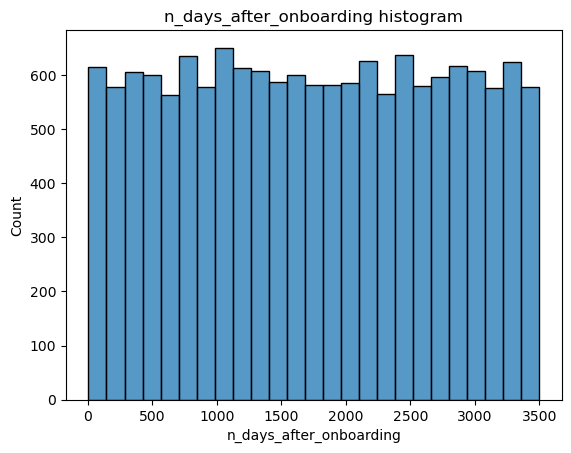

In [25]:
# n_days_after_onboarding Histogram
sns.histplot(x=df['n_days_after_onboarding'])
plt.title('n_days_after_onboarding histogram')
plt.show()

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

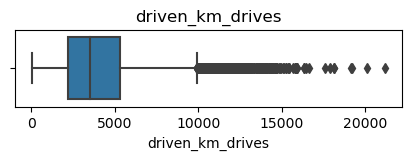

In [26]:
# driven_km_drives Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'])
plt.title('driven_km_drives')
plt.show()

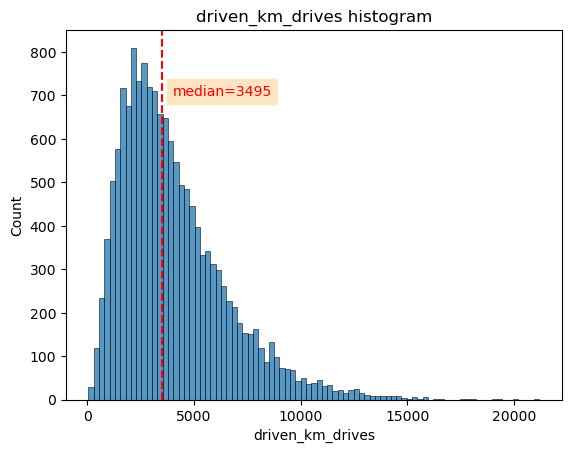

In [27]:
# driven_km_drives Histogram
sns.histplot(x=df['driven_km_drives'])
plt.axvline(df['driven_km_drives'].median(), color='red', linestyle='--')
plt.text(4000,700,'median=3495',color='red',backgroundcolor='bisque')
plt.title('driven_km_drives histogram')
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

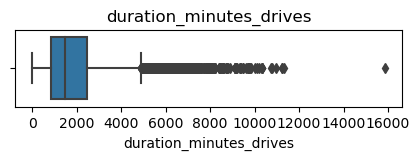

In [28]:
# duration_minutes_drives Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'])
plt.title('duration_minutes_drives')
plt.show()

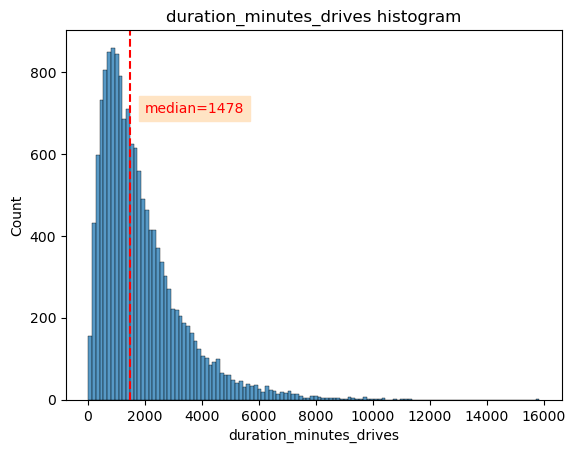

In [29]:
# duration_minutes_drives Histogram
sns.histplot(x=df['duration_minutes_drives'])
plt.axvline(df['duration_minutes_drives'].median(), color='red', linestyle='--')
plt.text(2000,700,'median=1478',color='red',backgroundcolor='bisque')
plt.title('duration_minutes_drives histogram')
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

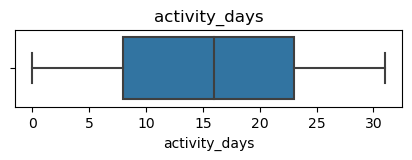

In [30]:
# activity_days Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'])
plt.title('activity_days')
plt.show()

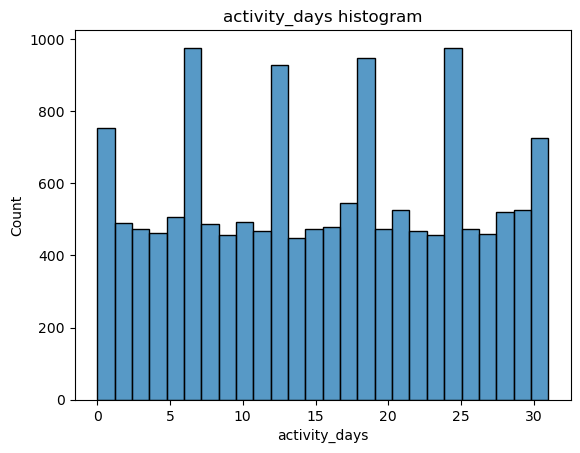

In [31]:
# activity_days Histogram
sns.histplot(x=df['activity_days'])
plt.title('activity_days histogram')
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

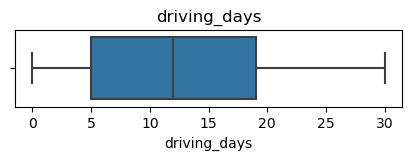

In [32]:
# driving_days Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'])
plt.title('driving_days')
plt.show()

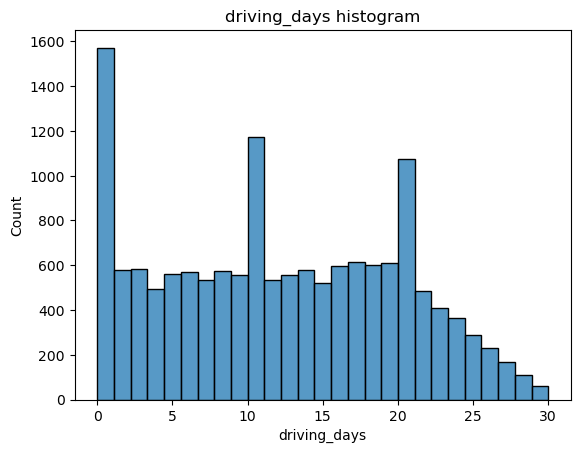

In [33]:
# driving_days Histogram
sns.histplot(x=df['driving_days'])
plt.title('driving_days histogram')
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

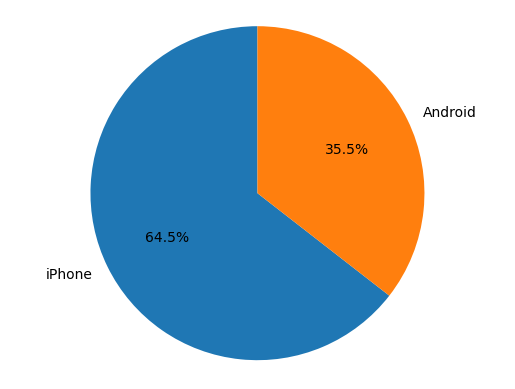

In [34]:
# device Pie chart
device_counts = df['device'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

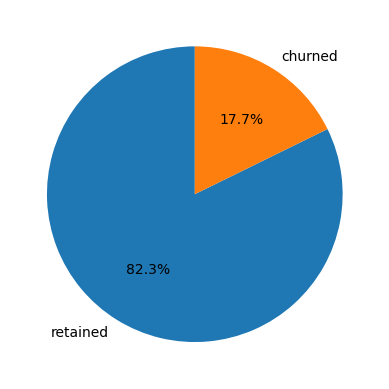

In [35]:
# label Pie chart
data = df['label'].value_counts()
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.show()

Less than 18% of the users churned.

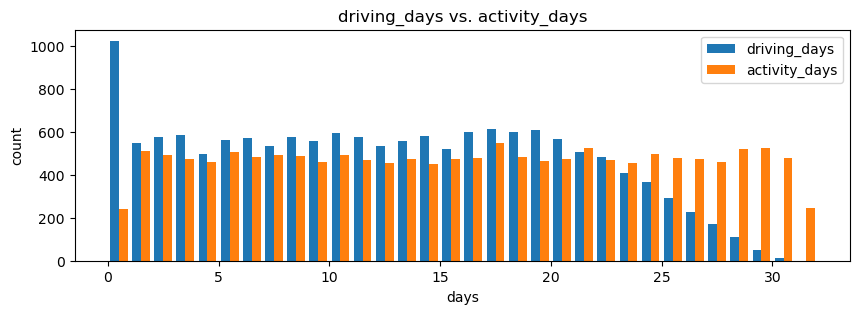

In [36]:
# Histogram
plt.figure(figsize=(10,3))
label=['driving_days', 'activity_days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')
plt.show()

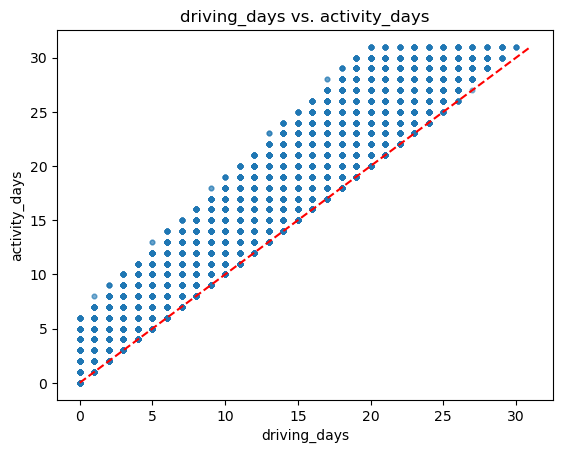

In [37]:
# Scatter plot
plt.scatter(df['driving_days'],df['activity_days'], s=11, alpha=0.2)
plt.plot([0,31],[0,31],linestyle='--',color='red')
plt.xlabel('driving_days')
plt.ylabel('activity_days') 
plt.title('driving_days vs. activity_days')
plt.show()

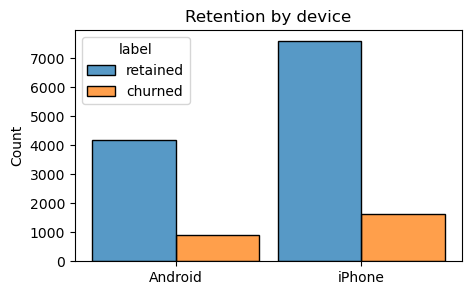

In [38]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(data=df,
             x=df.device,
             hue=df.label,
             multiple='dodge',
             shrink=0.9)
plt.title('Retention by device')
plt.xlabel('')
plt.show()

The proportion of churned users to retained users is consistent between device types.

In [39]:
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [40]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

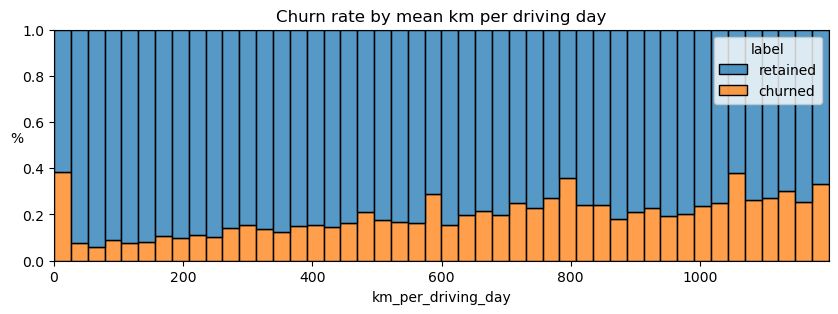

In [41]:
# Histogram
plt.figure(figsize=(10,3))
mask = df['km_per_driving_day']<1200
sns.histplot(x=df['km_per_driving_day'][mask],
             hue=df['label'],
             multiple='fill')
plt.ylabel('%',rotation=0)
plt.title('Churn rate by mean km per driving day')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

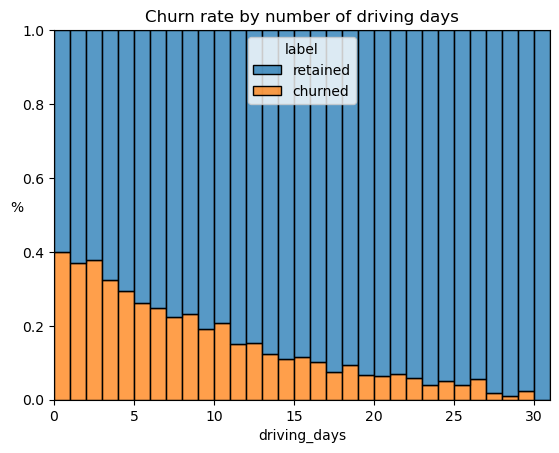

In [42]:
# Histogram
sns.histplot(x=df['driving_days'],
             bins=range(0,32),
             hue=df['label'],
             multiple='fill')
plt.title('Churn rate by number of driving days')
plt.ylabel('%',rotation=0)
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

In [43]:
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']

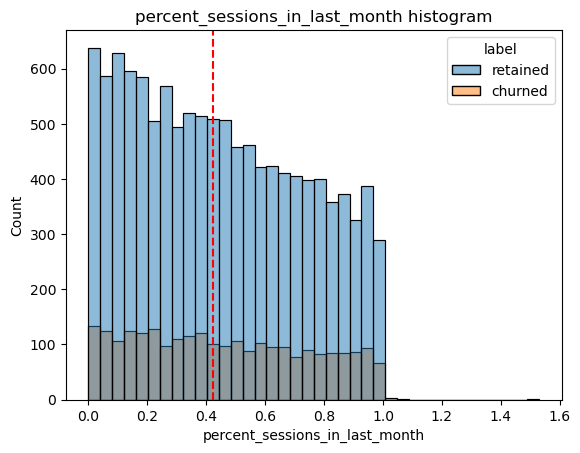

In [44]:
# Histogram
sns.histplot(x=df['percent_sessions_in_last_month'],
             hue=df['label'])
plt.axvline(df['percent_sessions_in_last_month'].median(),linestyle='--',color='red')
plt.title('percent_sessions_in_last_month histogram')
plt.show()

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

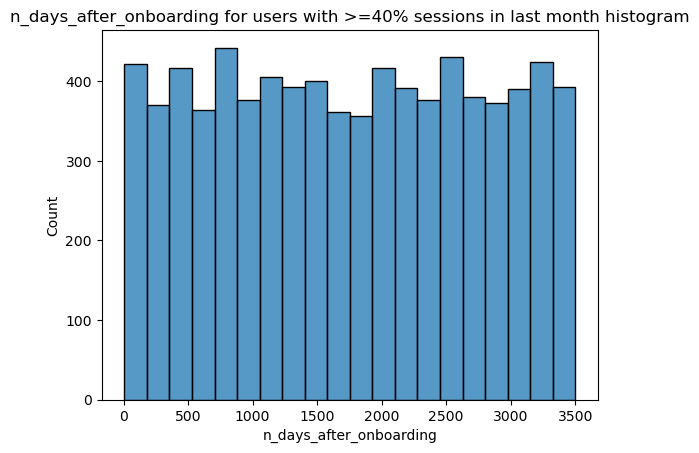

In [45]:
# Histogram
sns.histplot(x=df['n_days_after_onboarding'][df['percent_sessions_in_last_month']>=0.4])
plt.title('n_days_after_onboarding for users with >=40% sessions in last month histogram')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

In [46]:
def outlier_imputer(column,percentile):
    threshold = df[column].quantile(percentile)
    df.loc[df[column] > threshold, column] = threshold
    return print(f'{column} threshold: {threshold:.2f}')

In [47]:
columns = ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']
for i in columns:
    outlier_imputer(i,0.95)

sessions threshold: 243.00
drives threshold: 201.00
total_sessions threshold: 454.36
driven_km_drives threshold: 8889.79
duration_minutes_drives threshold: 4668.90


In [48]:
df.to_csv('/Users/eniseranabeklen/Desktop/portfolio/waze_cleaned')

## Conclusion

1. The data contains missing values only in 'label' column. There are 700 values missing in that column. There was no pattern to the missing data.

2. The mean value gets affected by the outliers in the data. Median doesn't get affected by outliers therefore it can be a more accurate measure to estimate data.

3. In the analysis, it is observed that churned users has driven 608 km per day. It is a significantly higher value compared to retained users who has driven 245 km per day. Waze team should explore the reasons behind why churned users use the app or their specific needs and problems. 

4. The iPhone users is represented by % 65 of the data while Android users had % 35 approximately.

5. Churned users generally drove longer distances in fewer days.

6. Most of the columns have uniform or right-skewed distributions. Right-skewed distribution means that most users had values in the left side of the range. Uniform distribution means the users have equally distributed within the range. 

7. The data was not problematic generally. However 'driven_km_drives' column has some unrealistic outlier values. Additionaly some data points showed that driving_days has higher value than activity days which is impossible.

8. Waze team should confirm the maximum number of driving days and activity days which should be the same. Also I want to ask that why so many users started the use the app in the last month even though they signed up way earlier.

9. %17.7 of users are churned.

10. Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

11. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.
